## PS3 Discussion Week 8: Analyzing Survey Data


# Public Policy Preferences of DIS 110/111

## 2.1. Getting Familiar with Survey Data

Let's look at the data from the first-week survey. 

It's part of my own research that studies the effect of presenting cross-cutting information on individuals' identities and policy attitudes.

1. The survey had three treatments: 
- no information
- Californian median income
- Californian median income + US median income

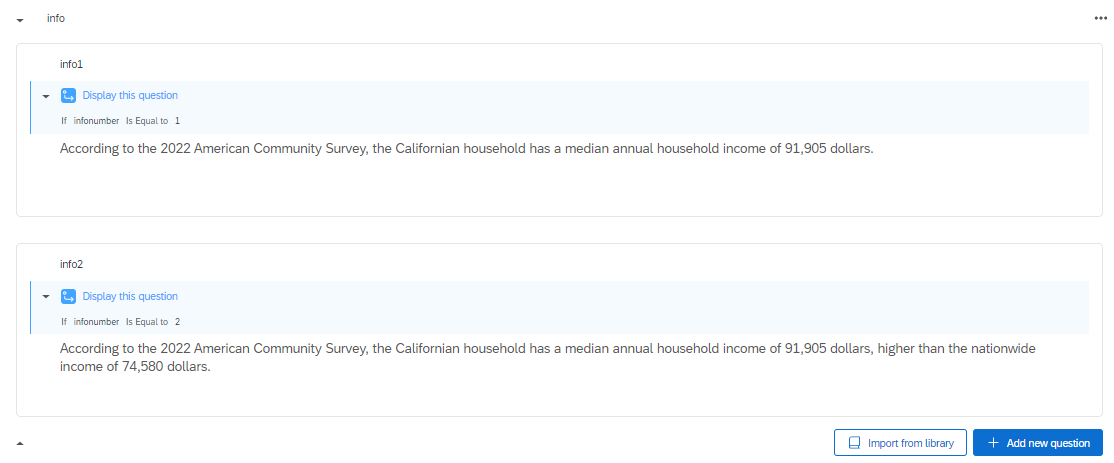

2. The survey included policy preferences, measured by a "candidate choice" exeriment. 

Where there are two randomly generated profiles, each containing characteristics of the candidates in four dimensions--gender, experience, career, and policy priority. To collect a larger number of samples, this exercise was repeated seven times. 

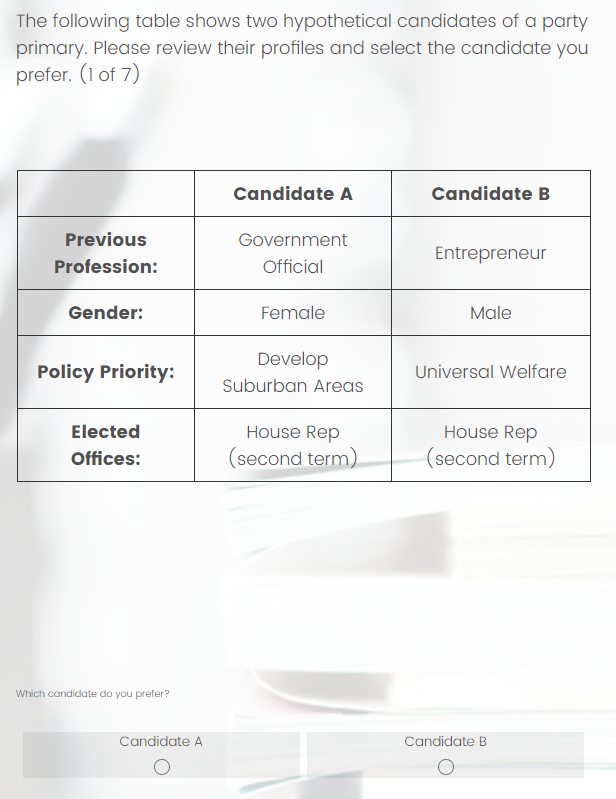

Example of Randomly-generated Candidate Profiles

3. The survey also included questions on people's identities.

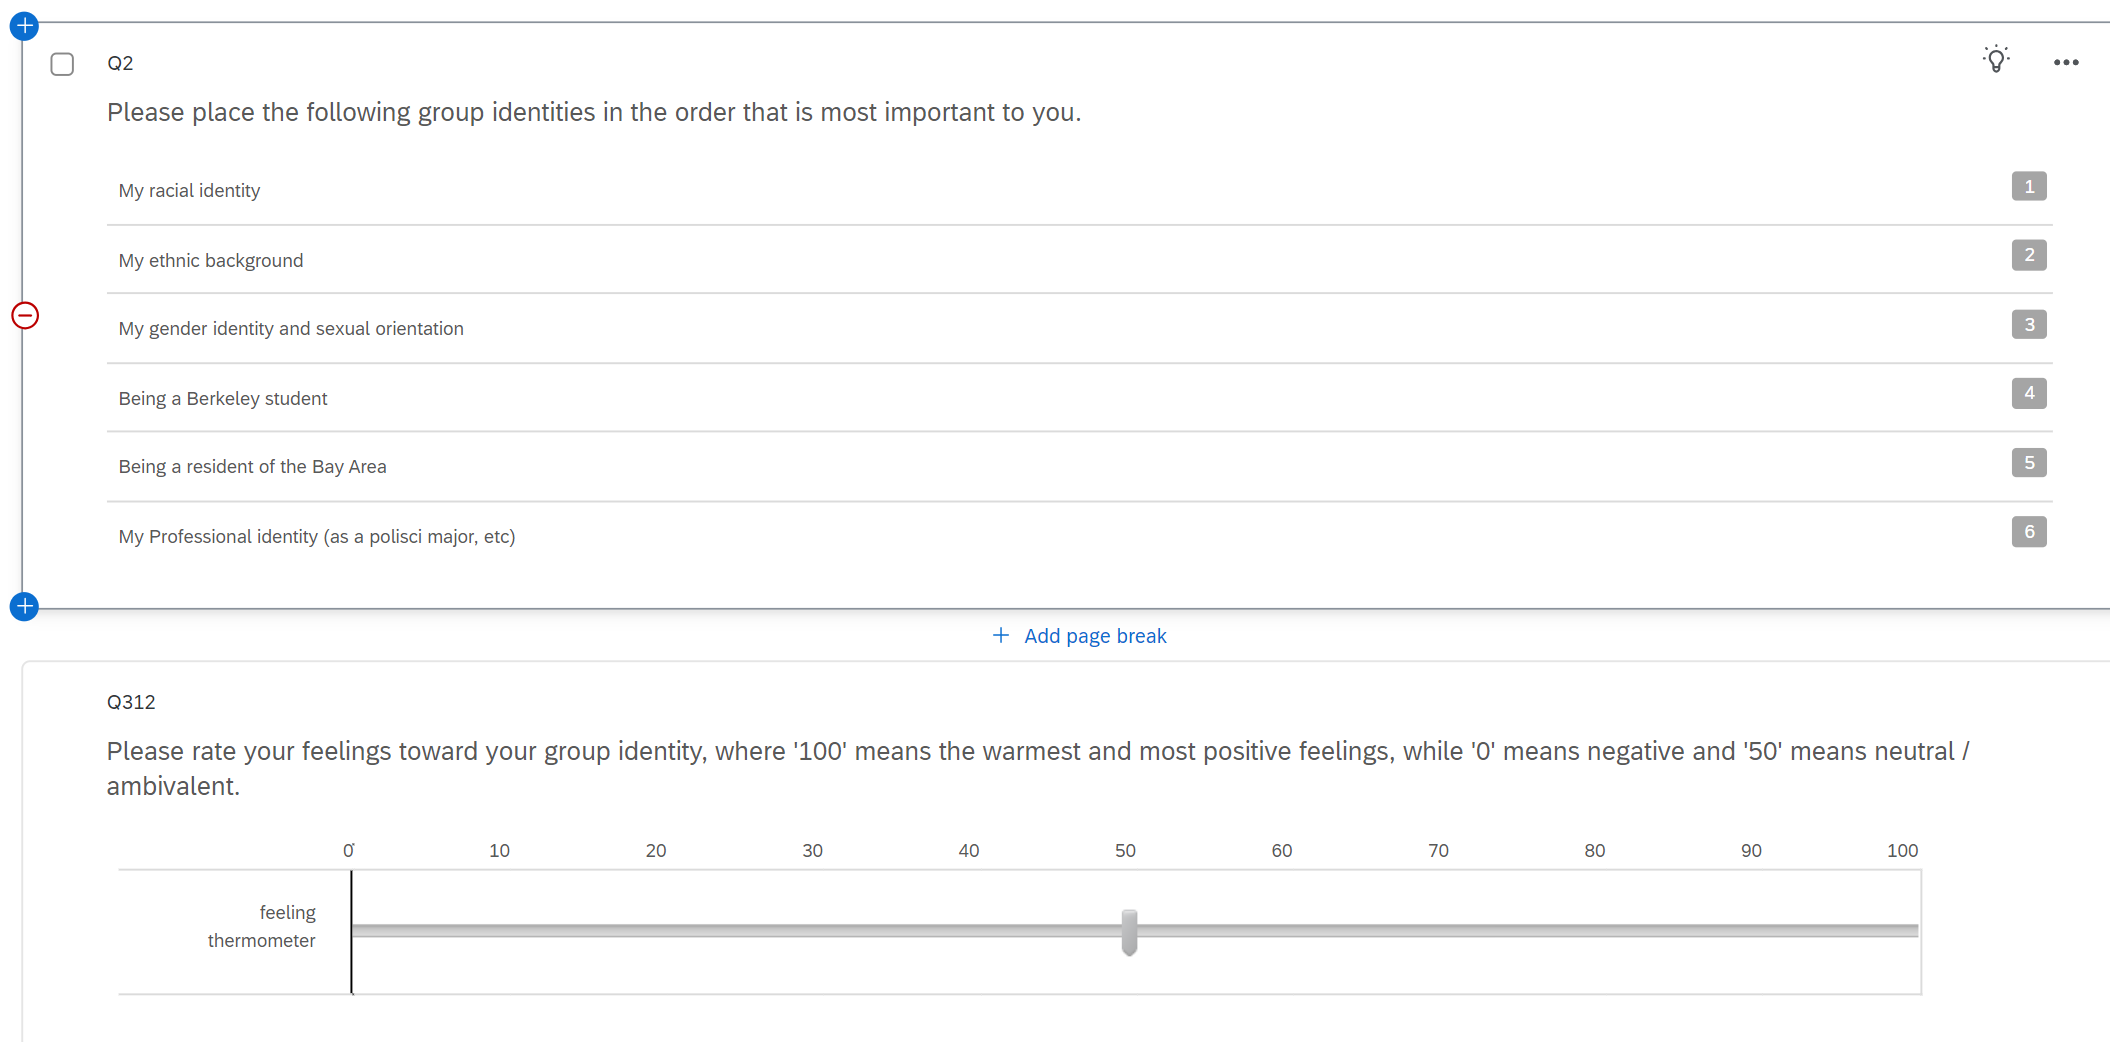

In [5]:
survey <- readRDS("survey.RData")
head(survey)

start <- read

ResponseId,taskNum,choiceNum,selected,Priority,Gender,ElectedOffices,PreviousProfession,info,Q9,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9
R_120oto31D0ZIBdn,1,1,0,Green Energy Transition,Female,No Previous Office,Entrepreneur,1,7am63b,2,3,6,4,5,1
R_5OwuzXBOTpeOKCG,1,1,0,Inter-regional inequality,Female,House Rep (second term),Entrepreneur,0,edgn2x,2,1,3,5,4,6
R_1sciFOFzYSVOvhD,1,1,1,Lower-income class,Male,House Rep (second term),Government Official,2,fj9qo3,1,2,6,3,5,4
R_5kWkOswSRKGUpA5,1,1,1,Inter-regional inequality,Female,No Previous Office,Entrepreneur,0,5t6hyi,5,6,2,4,3,1
R_7qhVi1HkSjsMxvr,1,1,1,Lower-income class,Male,Senator,Entrepreneur,0,h0uldb,3,2,5,4,1,6
R_6PWWbi85PzYIvPh,1,1,0,Universal Welfare,Female,House Rep (second term),Government Official,2,heowwz,1,2,6,5,4,3


## 2.2. Practice: Calculate means! 

While you are welcome to study further, for now, just focus on one variable among the four dimensions that you are interested in studying, which would be your 'treatment' variable. 

For example, the column `Gender` has a value of `Female` if the randomized candidate choice profile said "Female", and `Male` if the profile said male. `Selected`=1 means the survey respondent chose that candidate as the preferred candidate, 0 means the profile was not selected.

In [6]:
#First, use the Table command to see how many policy options were there.
table(survey$Priority) 
table(survey$Gender)
table(survey$PreviousProfession)


        Universal Welfare    Develop Suburban Areas   Green Energy Transition 
                      144                       152                       149 
Inter-regional inequality        Lower-income class 
                      159                       152 


Female   Male 
   375    381 


       Entrepreneur Government Official              Lawyer 
                257                 263                 236 

These are all treatment variables! Pick one that most interests you, and if a variable has more than two options, pick two options (ex. compare the average of "Universal Welfare" versus "Develop Suburban Areas".) and calculate their mean difference.

In [ ]:
# calculate your mean

Bonus: One way of simplifying the mean of the subset is by adding a conditional statement to the `mean()` function as a second argument. You need to use the pipe symbol `|` or shift+backslash. It's usually located next to `[` `]` on the keyboard.

In [10]:
mean(survey$selected|survey$Priority=="Universal Welfare")
mean(survey$selected|survey$Priority=="Develop Suburban Areas")

[1] 0.5873016

[1] 0.6455026

Bonus 2: Another way of calculating means all at once, is :


In [11]:
suppressMessages(install.packages("FSA")) #run this line this if you are running the session for the first time
library(FSA)

Warning message:
"dependencies 'MASS', 'pbkrtest', 'lattice' are not available"


  There are binary versions available but the source versions are later:
             binary    source needs_compilation
RcppEigen 0.3.3.9.1 0.3.3.9.4              TRUE
lme4         1.1-26  1.1-35.1              TRUE
car          3.0-10     3.1-2             FALSE
FSA          0.8.32     0.9.5             FALSE

  Binaries will be installed
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\james\AppData\Local\Temp\RtmpKIZMTQ\downloaded_packages


Warning message in install.packages("FSA"):
"installation of package 'car' had non-zero exit status"Warning message in install.packages("FSA"):
"installation of package 'FSA' had non-zero exit status"

ERROR: Error in library(FSA): there is no package called 'FSA'


In [8]:

Sum <- Summarize(selected ~ Priority,
                data=survey)
Sum

ERROR: Error in Summarize(selected ~ Priority, data = survey): 함수 "Summarize"를 찾을 수 없습니다


## 2.3. (bonus) Plots

Below is a sample code to generate a plot.
Note that this is outside the goals of this course--you will not be asked to generate a plot in the course nor in your term papers.

In [ ]:
suppressMessages(install.packages("ggplot2"))  #run this line this if you are running the session for the first time
library(ggplot2)
library(dplyr)

In [ ]:
Sum = Summarize(selected ~ Priority + info,
                data=survey)  #creates a convenient dataframe of conditional means
Sum$se = Sum$sd / sqrt(Sum$n)

ate1 <- Sum %>% # The data frame to use.
  ggplot(              
    aes(x= Priority, y= mean)) + #specify which variables to use
  geom_point(size  = 2,  #add a geom_point plot, which plots "points"
    position = position_dodge(0.35)) +  #position of the plots
  geom_errorbar(aes(ymin  = mean - 1.96*se, #add a plot of "error bars" , where ymin is the lower bound, ymax is upper bound.
                    ymax  = mean + 1.96*se),
                width = 0.3,
                size  = 1,
                position = position_dodge2(preserve = "single")) +
  theme_bw() + #other options on title, lables, color of bar, size of line etc. 
         theme(legend.position=c(0.85,0.84),axis.title = element_text(face = "bold",size=14),plot.title=element_text(hjust=0.5,face="bold", size=16),
               plot.caption=element_text(hjust=1,size=13,face="italic")) +  ylab("Ratio of Profiles Selected") +
         xlab("Policy Priority of Candidate") +
         labs(caption="Note: Dots indicate average rate of candidate featuring the policy priority being selected, \n bars indicate 95% confidence level.", 
              title="Candidate Selection") +
         theme(text = element_text(family = "serif"))
       
ate1



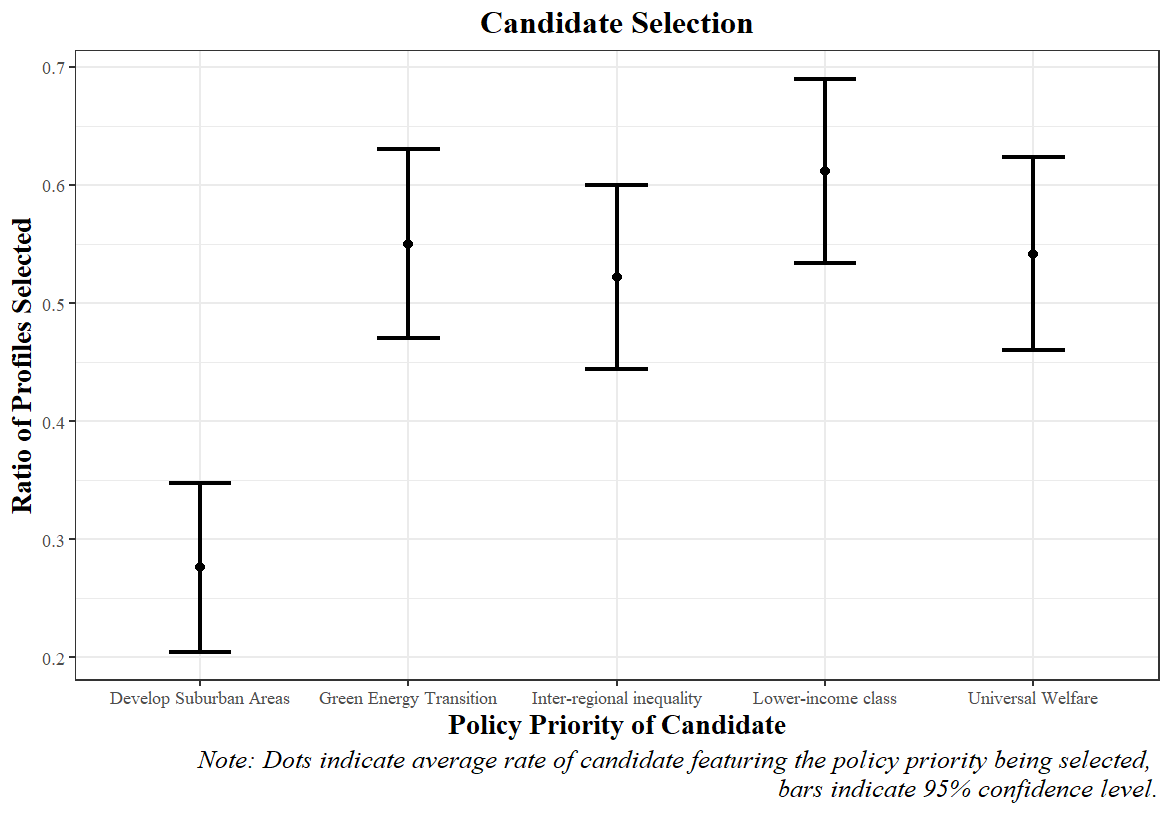